In [4]:
%matplotlib inline

import sys
sys.path.append('../')

from agentsClasses.QLearningClass import QLearningAgent
from utilities.plots import create_grids, plot_trajectory
from utilities.jsonRW import writeJSON

In [5]:
#Hyperparameters
show_stats = True       # show stats
export_to_JSON = False  # write JSON file
render = True           # render the results after training

NUM_AGENTS = 1

SHAPE = "5x5"             # "5x5" or "14x14"

if SHAPE == "5x5":
    EPISODES_PER_AGENT = 3000
    MAX_STEPS_PER_EPISODE = 100
elif SHAPE == "14x14":
    EPISODES_PER_AGENT = 6000
    MAX_STEPS_PER_EPISODE = 200    #Esto igual es muy poco para el 14x14, lo cual afecta a la grafica de training error

EPS_START = 1.0
EPS_DECAY = EPS_START/(EPISODES_PER_AGENT/2)  # reduce the exploration over time
EPS_END = 0.1

DISCOUNT_FACTOR = 0.95
LR = 0.02

In [6]:
#CREATING AND TRAINING THE AGENTS
agents_arr = []

print("Starting training of", NUM_AGENTS, "Q-learning agents")

for i in range(NUM_AGENTS):
    print("Agent", i+1, "/", NUM_AGENTS)
    agent = QLearningAgent(i, SHAPE, EPISODES_PER_AGENT, MAX_STEPS_PER_EPISODE, LR, EPS_START, EPS_DECAY, EPS_END, DISCOUNT_FACTOR)
    
    agent.train()
    agents_arr.append(agent)

Starting training of 1 Q-learning agents
Agent 1 / 1


100%|██████████| 3000/3000 [00:10<00:00, 278.09it/s]


La longitud estimada para el eje X del training error es: 47730


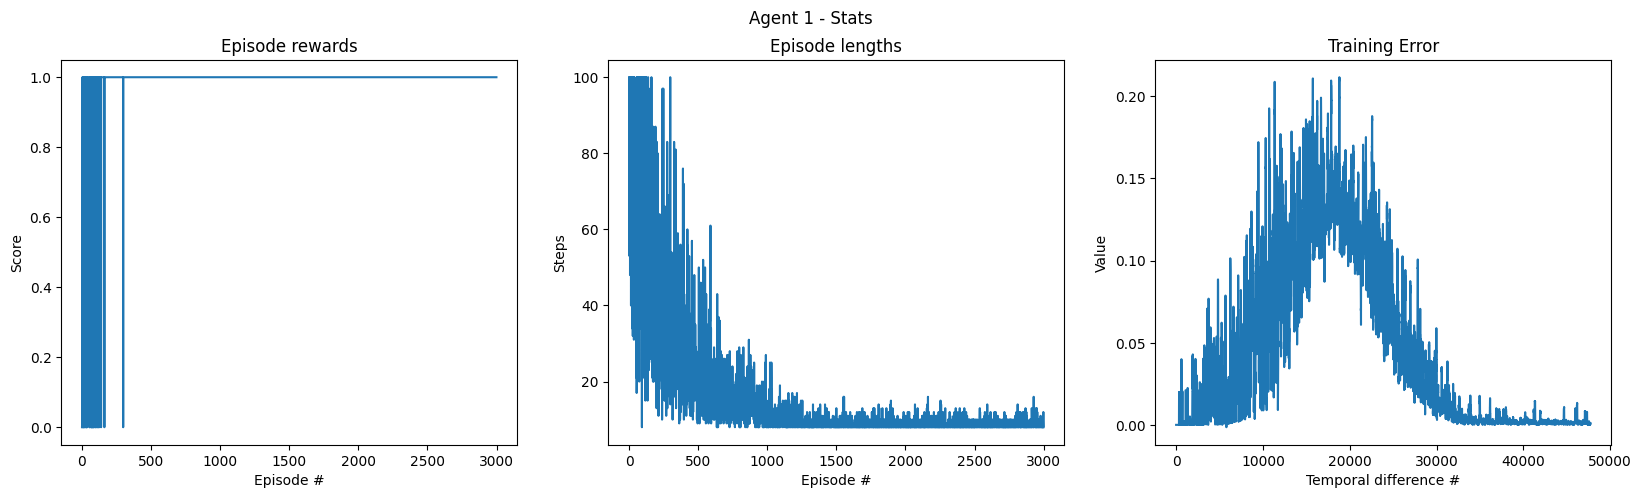

In [7]:
if show_stats:
    for agent in agents_arr:
        print("La longitud estimada para el eje X del training error es:", agent.total_steps)
        agent.plot_results(rolling_length=1, rolling_error=50)

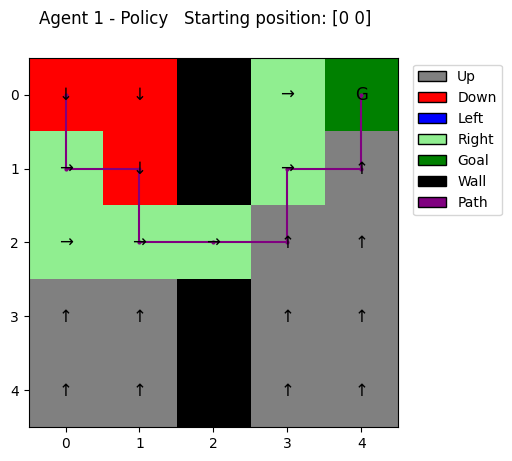

In [8]:
for agent in agents_arr:
    value_grid, policy_grid, string_policy_grid = create_grids(agent.env, agent=agent)
    start_pos = agent.env.unwrapped.start_pos

    if export_to_JSON:
        writeJSON(agent.algorithm, agent.n_episodes, agent.max_steps, agent.shape, start_pos, value_grid, policy_grid, string_policy_grid)

    if render:
        plot_trajectory(string_policy_grid, start_pos, agent.id+1)